# **Analisis Prediksi Kesehatan Mental Siswa**

Proyek ini bertujuan untuk mengembangkan model prediksi depresi pada siswa dengan memanfaatkan dataset yang ada (Student Depression Dataset) dan teknik machine learning. Dengan menggunakan dataset yang tersedia dan teknik machine learning, proyek ini berpotensi memberikan kontribusi nyata dalam upaya meningkatkan kesejahteraan mental siswa di lingkungan pendidikan.

In [102]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.combine import SMOTETomek
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, balanced_accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import RandomizedSearchCV
import shap

## **Data Understanding**

Data yang digunakan dalam proyek analisis prediksi kesehatan mental (depresi) mahasiswa ini adalah **"Student Depression Dataset"**. Dataset ini bersumber dari platform Kaggle yang dapat diakses pada tautan [Student Depression Dataset](https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset/data).Tujuan utama dataset ini adalah untuk menyediakan data bagi penelitian dan pengembangan model yang dapat mengidentifikasi faktor-faktor terkait depresi di kalangan siswa.

In [ ]:
df = pd.read_csv("student_depression_dataset.csv")

In [45]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


Akan dilakukan tahapan Data Understanding untuk memahami dataset yang akan digunakan. 

In [46]:
df.shape

(27901, 18)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

Dataset ini berisi 27.901 data record siswa dengan 18 fitur yang mencakup informasi demografis, akademik, dan indikator kesehatan mental. 

In [48]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


Tabel di atas menunjukkan statistik deskriptif dari variabel numerik. Secara keseluruhan, dapat diketahui bahwa umur siswa berada dalam rentang 18-59 tahun dengan rata-rata 25 tahun. `Academic Pressure`, `Work  Pressure`, `Study Satisfaction`, dan `Job Satisfaction` menggunakan skala rating. IPK siswa berada dalam rentang 0-10 dengan rata-rata 7,65. Jam kerja/belajar siswa berada dalam rentang 0-12 jam dengan rata-rata 7,15 jam. Variabel terget yaitu `Depression` seharusnya merupakan variabel biner. 

In [49]:
df.describe(include='object')

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Financial Stress,Family History of Mental Illness
count,27901,27901,27901,27901,27901,27901,27901,27901,27901
unique,2,52,14,5,4,28,2,6,2
top,Male,Kalyan,Student,'Less than 5 hours',Unhealthy,'Class 12',Yes,5.0,No
freq,15547,1570,27870,8310,10317,6080,17656,6715,14398


Dari tabel di atas, dapat diketahui jumlah kategori, nilai modus, dan jumlah kemunculan modus dari setiap variabel kategorik

In [50]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

Data tidak mengandung *missing value*.

In [51]:
df.duplicated().sum()

np.int64(0)

Tidak terdapat data terduplikat.

In [52]:
num_features = df.select_dtypes(include=['number']).columns.tolist()
cat_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Fitur Numerik:", num_features)
print("Fitur Kategorikal:", cat_features)

Fitur Numerik: ['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Depression']
Fitur Kategorikal: ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Financial Stress', 'Family History of Mental Illness']


Data awal terdiri dari 9 variabel kategorik dan 9 variabel numerik.

In [53]:
for var in cat_features:
    print(df[var].value_counts())
    print('\n')

Gender
Male      15547
Female    12354
Name: count, dtype: int64


City
Kalyan                  1570
Srinagar                1372
Hyderabad               1340
Vasai-Virar             1290
Lucknow                 1155
Thane                   1139
Ludhiana                1111
Agra                    1094
Surat                   1078
Kolkata                 1066
Jaipur                  1036
Patna                   1007
Visakhapatnam            969
Pune                     968
Ahmedabad                951
Bhopal                   934
Chennai                  885
Meerut                   825
Rajkot                   816
Delhi                    768
Bangalore                767
Ghaziabad                745
Mumbai                   699
Vadodara                 694
Varanasi                 685
Nagpur                   651
Indore                   643
Kanpur                   609
Nashik                   547
Faridabad                461
Saanvi                     2
Bhavna                     2


Output di atas menunjukkan sebaran tiap kategori pada variabel kategorik. Kita juga dapat mengetahui kategori apa saja yang terdapat pada suatu variabel dan mengidentifikasi apabila terdapat nilai yang tidak valid, misalnya kategori ? pada variabel `Financial Stress`.

**Histogram Variabel Numerik**

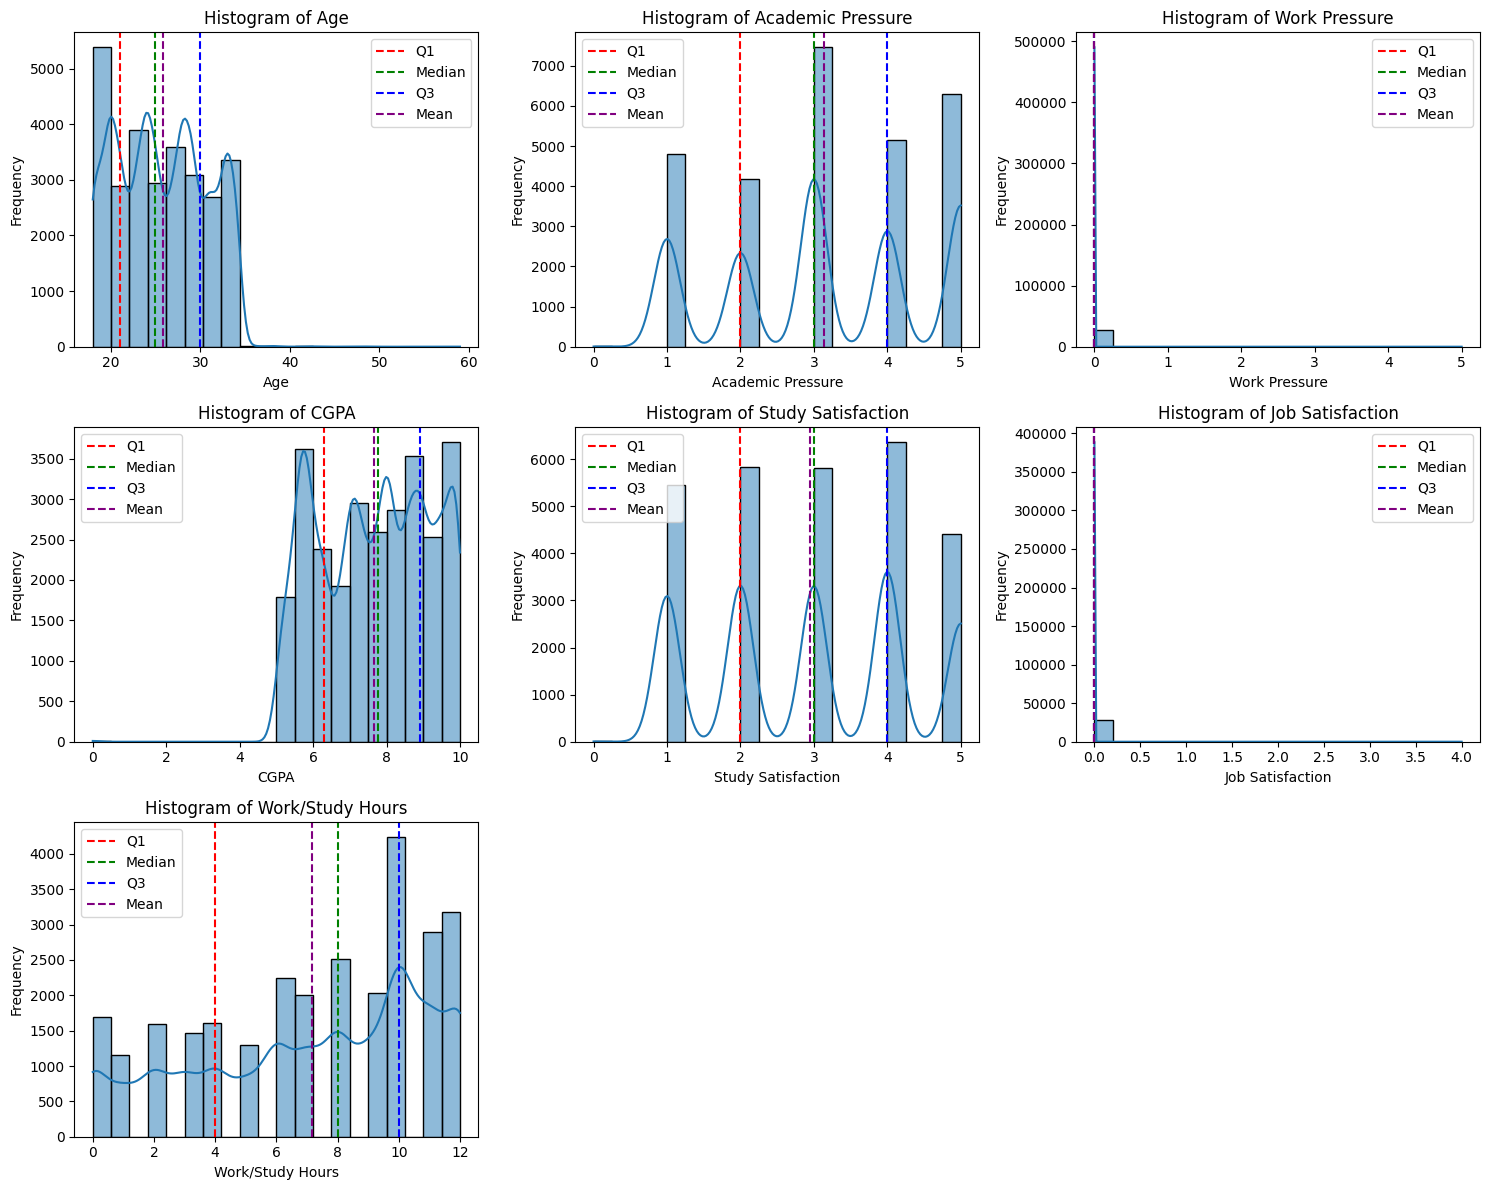

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12)) 
axes = axes.flatten() 

num = [col for col in num_features if col not in ['id', 'Depression']]

for i, var in enumerate(num):
    q1 = df[var].quantile(0.25)
    median = df[var].median()
    q3 = df[var].quantile(0.75)
    mean = df[var].mean()

    sns.histplot(data=df, x=var, bins=20, kde=True, ax=axes[i])

    axes[i].axvline(q1, color='red', linestyle='--', label='Q1')
    axes[i].axvline(median, color='green', linestyle='--', label='Median')
    axes[i].axvline(q3, color='blue', linestyle='--', label='Q3')
    axes[i].axvline(mean, color='purple', linestyle='--', label='Mean')

    axes[i].set_title(f'Histogram of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

for j in range(len(num), len(axes)):  
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Secara keseluruhan, histogram-histogram di atas memberikan gambaran mengenai distribusi berbagai variabel numerik dalam dataset. Garis-garis vertikal menunjukkan Kuartil 1 (Q1), Median (Q2), Kuartil 3 (Q3), dan Rata-rata (Mean). Dari histogram dapat diketahui bahwa dataset mencakup siswa dengan rentang usia 18-30 tahun. Banyak variabel seperti tekanan akademik dan kepuasan studi menggunakan skala rating.Faktor pekerjaan (tekanan dan kepuasan) tidak relevan bagi sebagian besar sampel, karena mayoritas siswa tidak bekerja. Kemudian, IPK dan jam belajar menunjukkan pola yang bervariasi di antara siswa.

**Bar Chart Variabel Kategorik**

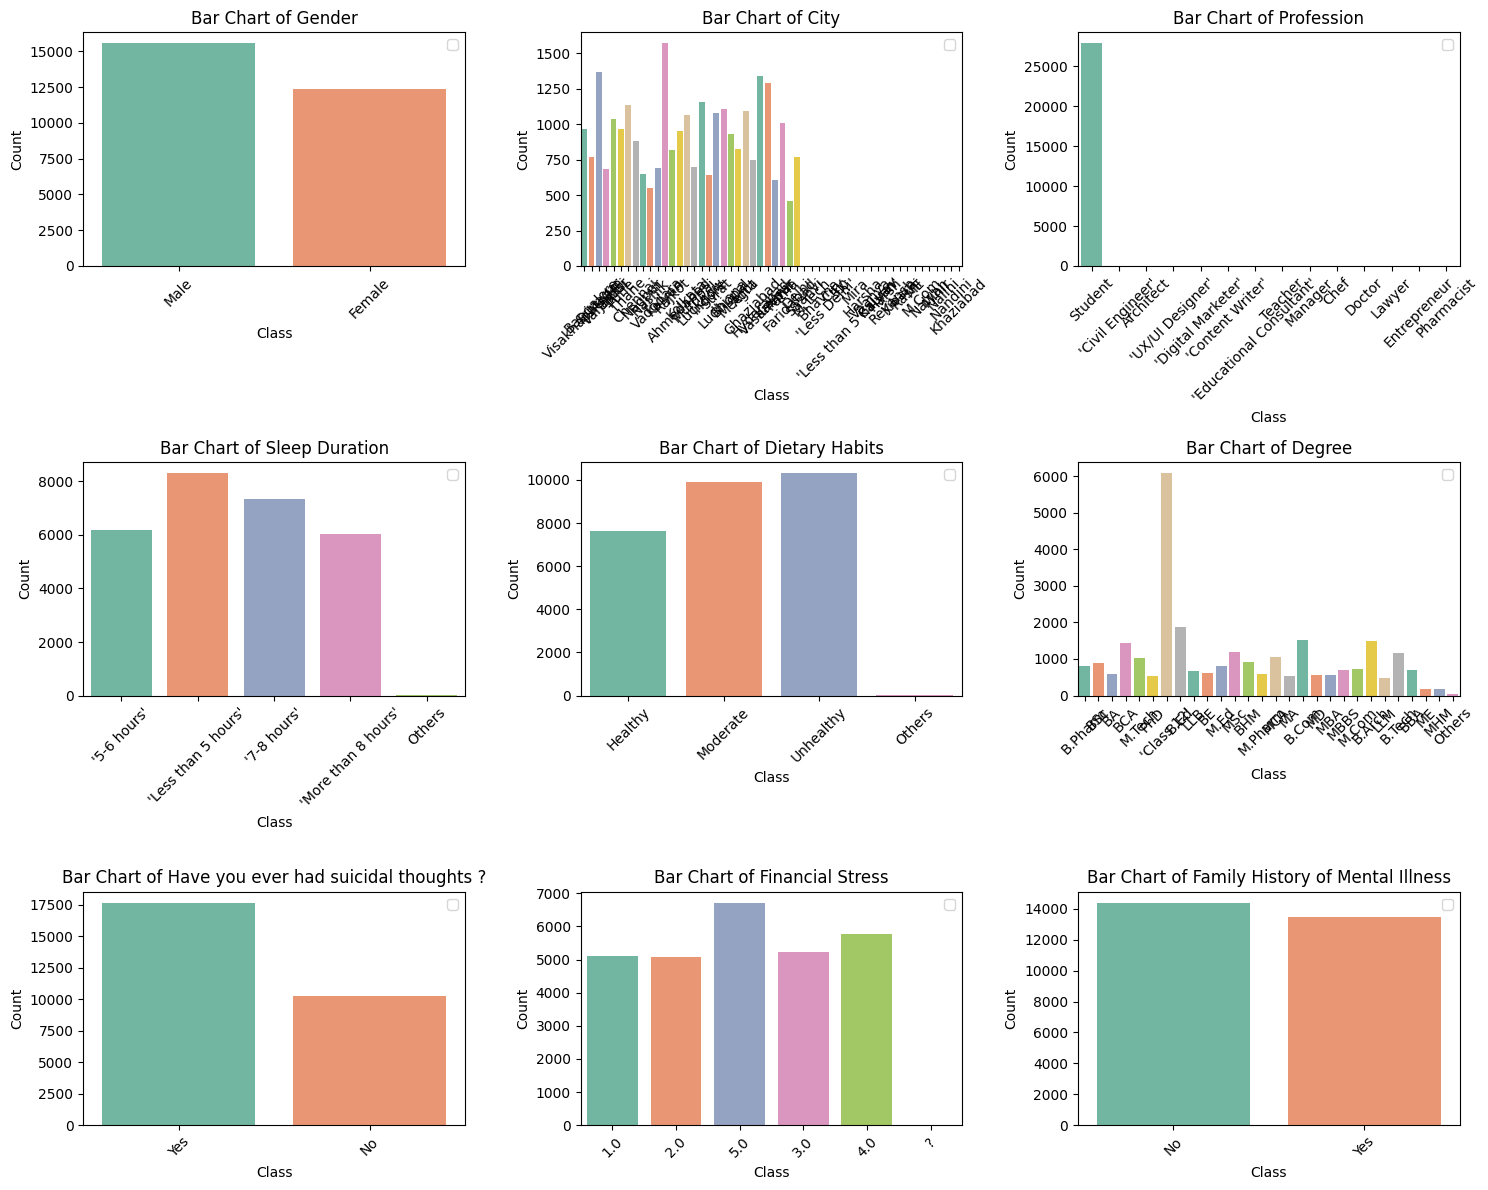

In [55]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12)) 
axes = axes.flatten() 

for i, var in enumerate(cat_features):
  sns.countplot(data=df, x=var, ax=axes[i], hue=var, palette='Set2')
  axes[i].set_title(f'Bar Chart of {var}')
  axes[i].set_xlabel('Class')
  axes[i].set_ylabel('Count')
  axes[i].legend()
  axes[i].tick_params(axis='x', rotation=45)
  
for j in range(len(cat_features), len(axes)):  
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Secara keseluruhan, bar chart di atas menggambarkan distribusi frekuensi dari berbagai variabel kategori dalam dataset. Dari bar chart dapat diketahui bahwa dataset didominasi oleh siswa kelas 12 dengan distribusi gender yang cukup seimbang dan berasal dari berbagai kota. Banyak siswa mengalami kekurangan tidur, kebiasaan makan yang kurang baik, stres finansial, dan yang paling mencolok, tingginya prevalensi ideasi bunuh diri serta riwayat keluarga dengan penyakit mental.

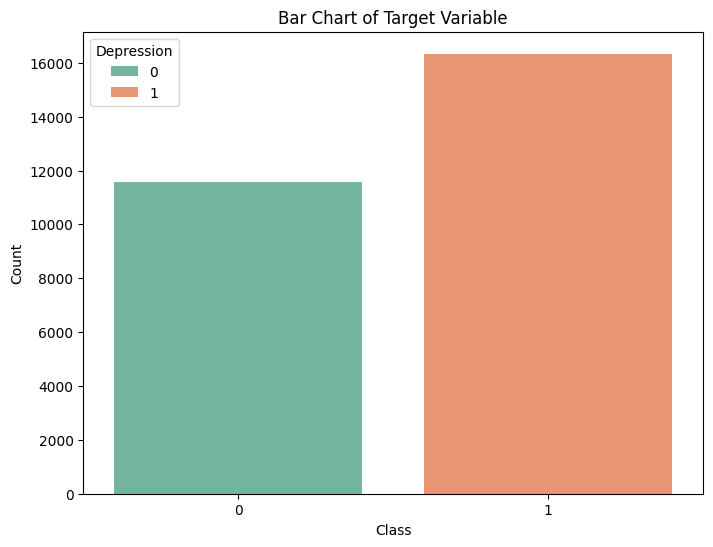

In [56]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Depression', hue='Depression', palette='Set2')
plt.title('Bar Chart of Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Dari bar chart di atas, terlihat bahwa terjadi ketidakseimbangan antara kelas 0 (siswa tidak mengalami depresi) dan kelas 1 (siswa mengalami depresi). Oleh karena itu, perlu dilakukan pre-processing supaya hasil klasifikasi tidak bias pada salah satu kelas. 

**Korelasi Antar Variabel Numerik**

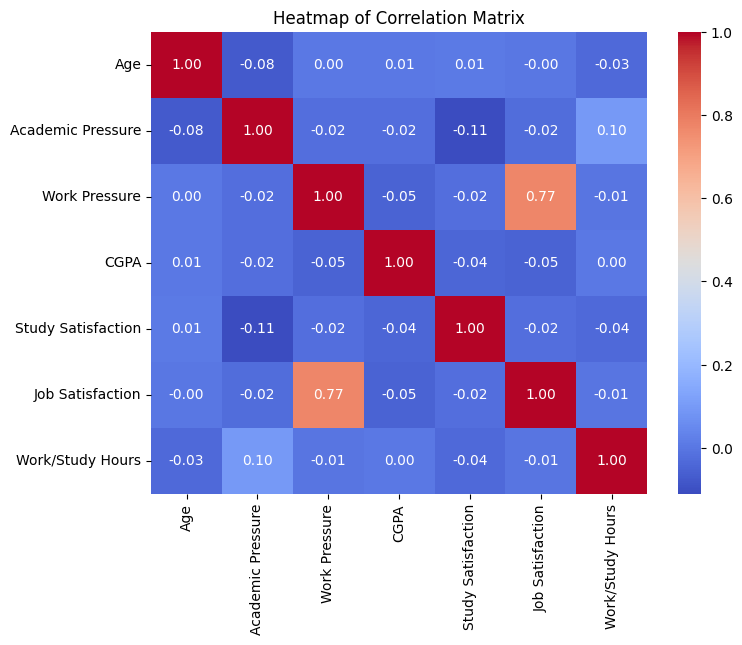

In [57]:
corr_matrix = df[num].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

Berdasarkan heatmap di atas, terlihat tidak ada hubungan linear yang kuat antara sebagian besar  variabel, kecuali antara `Work Pressure` dan `Job Satisfaction`. Hal ini menunjukkan bahwa untuk memahami hubungan yang lebih kompleks (non-linear) mungkin diperlukan teknik analisis yang lebih canggih atau pertimbangan interaksi antar variabel, karena korelasi linear sederhana tidak banyak memberikan informasi.

## **Data Preparation**

### **Data Cleaning**

Tahap ini melibatkan penanganan  masalah dalam data mentah dan dilakukan untuk menjamin kualitas data.

Dilakukan penghapusan kolom `ID` karena variabel ini tidak memberikan informasi yang bermanfaat dalam prediksi.

In [58]:
df.drop(columns=['id'], inplace=True)

Dilakukan penghapusan baris yang memiliki nilai '?' pada kolom `Financial Stress`.

In [59]:
df = df[df['Financial Stress'] != '?']

### **Feature Encoding**

Dibuat salinan dataframe agar proses encoding tidak mengubah dataframe asli.

In [103]:
df_encoded = df.copy()

Encoding dibagi menjadi empat tahap.

**Ordinal Encoding**

Diterapkan pada fitur ordinal yang memiliki urutan jelas, yaitu `Sleep Duration`, `Dietary Habits`, dan `Degree`. 

In [104]:
# Ordinal Encoding
sleep_order = ['Others', 'Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours']
diet_order = ['Others', 'Unhealthy', 'Moderate', 'Healthy']
degree_order = [
    'Others', 'Class 12', 'B.Ed', 'B.Com', 'BA', 'BBA', 'BCA', 'BSc', 'B.Tech', 'BE', 'BHM', 'B.Arch', 'B.Pharm', 'LLB', 'MBBS',
    'M.Com', 'MBA', 'MA', 'MCA', 'MSc', 'M.Ed', 'M.Tech', 'ME', 'M.Pharm', 'MD', 'PhD', 'LLM', 'MHM', 
]

ordinal_cols = ['Sleep Duration', 'Dietary Habits', 'Degree']
ordinal_categories = [sleep_order, diet_order, degree_order]

ord_enc = OrdinalEncoder(categories=ordinal_categories, handle_unknown='use_encoded_value', unknown_value=-1)
df_encoded[ordinal_cols] = ord_enc.fit_transform(df_encoded[ordinal_cols])

**One-hot Encoding**

Diterapkan pada fitur nominal yang tidak memiliki urutan, yaitu `Profession`. Profesi yang jarang (<10 data dengan profesi tersebut) akan digabungkan menjadi bernilai 'Others'. 

In [105]:
# One-hot Encoding
prof_counts = df_encoded['Profession'].value_counts()
rare_profs = prof_counts[prof_counts < 10].index
df_encoded['Profession'] = df_encoded['Profession'].replace(rare_profs, 'Others')

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
prof_ohe = ohe.fit_transform(df_encoded[['Profession']])
prof_feature_names = ohe.get_feature_names_out(['Profession'])
df_prof = pd.DataFrame(prof_ohe, columns=prof_feature_names, index=df_encoded.index)
df_encoded = pd.concat([df_encoded.drop(columns=['Profession']), df_prof], axis=1)

**Label Encoding**

Diterapkan pada fitur ordinal yang memiliki dua nilai (biner), yaitu `Gender`, `Have you ever had suicidal thoughts ?`, dan `Family History of Mental Illness`.

In [106]:
# Label Encoding
le = LabelEncoder()

df_encoded['Gender'] = le.fit_transform(df_encoded['Gender'])  
df_encoded['Have you ever had suicidal thoughts ?'] = le.fit_transform(df_encoded['Have you ever had suicidal thoughts ?'])
df_encoded['Family History of Mental Illness'] = le.fit_transform(df_encoded['Family History of Mental Illness'])

**Frequency Encoding**

Diterapkan pada fitur dengan kardinalitas tinggi, yaitu `City`.

In [107]:
# Frequency Encoding
city_counts = df_encoded['City'].value_counts()
df_encoded['City'] = df_encoded['City'].map(city_counts)
df_encoded['City'] = df_encoded['City'].fillna(0)

Fitur `Financial Stress` yang awalnya sudah dalam nilai angka hanya perlu diubah tipe datanya menjadi numerik. 

In [108]:
df_encoded['Financial Stress'] = pd.to_numeric(df_encoded['Financial Stress'], errors='coerce')

In [109]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27898 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27898 non-null  int64  
 1   Age                                    27898 non-null  float64
 2   City                                   27898 non-null  int64  
 3   Academic Pressure                      27898 non-null  float64
 4   Work Pressure                          27898 non-null  float64
 5   CGPA                                   27898 non-null  float64
 6   Study Satisfaction                     27898 non-null  float64
 7   Job Satisfaction                       27898 non-null  float64
 8   Sleep Duration                         27898 non-null  float64
 9   Dietary Habits                         27898 non-null  float64
 10  Degree                                 27898 non-null  float64
 11  Have yo

Seluruh variabel telah bernilai numerik dan dapat diproses oleh algoritma *machine learning*.

### **Feature Selection**

Tahap ini bertujuan untuk memilih subset fitur yang paling relevan dan informatif untuk memprediksi depresi. Digunakan metode filter berbasis uji statistik, yaitu ANOVA F-test, untuk memiliki 10 fitur teratas yang memiliki hubungan statistik terkuat dengan variabel target.

In [110]:
X = df_encoded.drop(columns=['Depression'])
y = df_encoded['Depression']

In [127]:
selector = SelectKBest(score_func=f_classif, k=10) 
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
selected_features.tolist()

['Age',
 'Academic Pressure',
 'CGPA',
 'Study Satisfaction',
 'Dietary Habits',
 'Degree',
 'Have you ever had suicidal thoughts ?',
 'Work/Study Hours',
 'Financial Stress',
 'Family History of Mental Illness']

Terpilih 10 fitur teratas yang memiliki hubungan statistik terkuat dengan variabel target.

In [112]:
df_selected = df_encoded[selected_features.tolist() + ['Depression']]
df_selected.head()

,Age,Academic Pressure,CGPA,Study Satisfaction,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,33.0,5.0,8.97,2.0,3.0,12.0,1,3.0,1.0,0,1
1,24.0,2.0,5.90,5.0,2.0,7.0,0,3.0,2.0,1,0
2,31.0,3.0,7.03,5.0,3.0,4.0,0,9.0,1.0,1,0
3,28.0,3.0,5.59,2.0,2.0,6.0,1,4.0,5.0,1,1
4,25.0,4.0,8.13,3.0,2.0,21.0,1,1.0,1.0,0,0


### **Data Splitting**

Data dibagi menjadi data train (80%) dan data test (20%). Data train digunakan untuk melatih model, sementara data test digunakan untuk menguji kemampuan model pada data yang belum pernah dilihat.

In [128]:
X = df_selected.drop(columns=['Depression'])
y = df_selected['Depression']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 22318
Test set size: 5580


*Splitting data* dilakukan sebelum scaling untuk menghindari *data leakage*

### **Feature Scaling**

Tahap ini bertujuan untuk menyeragamkan rentang nilai fitur-fitur numerik. Metode yang akan digunakan adalah StandardScaler, yang mengubah data sehingga memiliki rata-rata 0 dan standar deviasi 1.

In [130]:
num_features_update = ['Age', 'CGPA', 'Work/Study Hours']

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_features_update] = scaler.fit_transform(X_train[num_features_update])
X_test_scaled[num_features_update] = scaler.transform(X_test[num_features_update])

### **Imbalance Handling**

Dari proses EDA diketahui bahwa distribusi kelas pada variabel target tidak seimbang. Jika dataset tidak seimbang, model cenderung menjadi bias terhadap kelas mayoritas dan memiliki performa yang buruk dalam memprediksi kelas minoritas. Oleh karena itu, akan dilakukan penanganan dengan metode SMOTETomek yang merupakan teknik *resampling* gabungan antara SMOTE (Synthetic Minority Over-sampling Technique) dan Tomek Links.

In [131]:
smote = SMOTETomek(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [132]:
print("Distribusi kelas sebelum penanganan:")
print(y_train.value_counts())
print("\nDistribusi kelas setelah penanganan:")
print(pd.Series(y_train_smote).value_counts())

Distribusi kelas sebelum penanganan:
Depression
1    13103
0     9215
Name: count, dtype: int64

Distribusi kelas setelah penanganan:
Depression
0    12341
1    12341
Name: count, dtype: int64


Diperoleh hasil distribusi kelas yang seimbang antara kelas 0 (siswa tidak mengalami depresi) dan kelas 1 (siswa mengalami depresi).

## **Modeling**

Sesuai dengan *goals* yang telah ditetapkan, tahapan ini melibatkan eksperimen dengan berbagai algoritma dan penyetelan parameter untuk mendapatkan performa terbaik. Berdasarkan *Solution Statements* yang mengusulkan penggunaan dua atau lebih algoritma, pendekatan yang dilakukan adalah dengan menguji berbagai model dan kemudian memilih yang terbaik untuk dioptimalkan lebih lanjut.

In [133]:
def all_model(list_model, X_train, X_test, y_train, y_test):

    result = []
    for model in list_model:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        bal_accuracy = balanced_accuracy_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred)

        hasil = {
            'Model' : type(model).__name__,
            'Accuracy' : accuracy,
            'Recall' : recall,
            'Precision' : precision,
            'F1 Score' : f1,
            'AUC' : auc,            
        }

        result.append(hasil)

    result_all = pd.DataFrame(result)

    return result_all

 Langkah pertama adalah menguji serangkaian algoritma *machine learning* yang beragam untuk mendapatkan gambaran performa *baseline* masing-masing.

In [134]:
daftar_model = [
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    LogisticRegression(max_iter = 1000, random_state=0),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    AdaBoostClassifier(random_state=0), 
    GradientBoostingClassifier(random_state=0),
    XGBClassifier(random_state=0),
    LGBMClassifier(random_state=0, verbose=-1),
    CatBoostClassifier(random_state=0),
    HistGradientBoostingClassifier(random_state=0)
]

Dilakukan iterasi pada setiap model dalam daftar, kemudian performa model diukut menggunakan metrik evaluasi yang terdiri dari *accuracy*, *precision*, *recall*, *F1-score*, dan AUC-ROC.

In [143]:
model_klasifikasi = all_model(daftar_model, X_train_smote, X_test_scaled, y_train_smote, y_test)
model_klasifikasi

Learning rate set to 0.040502
0:	learn: 0.6550752	total: 8.92ms	remaining: 8.91s
1:	learn: 0.6198560	total: 18.3ms	remaining: 9.11s
2:	learn: 0.5892403	total: 28.9ms	remaining: 9.6s
3:	learn: 0.5619542	total: 39.2ms	remaining: 9.77s
4:	learn: 0.5376676	total: 50.5ms	remaining: 10.1s
5:	learn: 0.5164247	total: 73.6ms	remaining: 12.2s
6:	learn: 0.4963286	total: 89.2ms	remaining: 12.6s
7:	learn: 0.4780128	total: 108ms	remaining: 13.4s
8:	learn: 0.4619861	total: 121ms	remaining: 13.3s
9:	learn: 0.4482663	total: 134ms	remaining: 13.3s
10:	learn: 0.4358774	total: 148ms	remaining: 13.3s
11:	learn: 0.4251970	total: 163ms	remaining: 13.4s
12:	learn: 0.4153969	total: 175ms	remaining: 13.3s
13:	learn: 0.4067203	total: 187ms	remaining: 13.2s
14:	learn: 0.3981878	total: 197ms	remaining: 13s
15:	learn: 0.3908674	total: 209ms	remaining: 12.9s
16:	learn: 0.3838631	total: 220ms	remaining: 12.7s
17:	learn: 0.3770202	total: 234ms	remaining: 12.8s
18:	learn: 0.3710684	total: 247ms	remaining: 12.7s
19:	lea

,Model,Accuracy,Recall,Precision,F1 Score,AUC
0,SVC,0.844982,0.869121,0.864042,0.866574,0.840438
1,KNeighborsClassifier,0.808423,0.840347,0.830835,0.835564,0.802413
2,DecisionTreeClassifier,0.773477,0.812191,0.799817,0.805956,0.766189
3,RandomForestClassifier,0.837814,0.875309,0.849295,0.862106,0.830755
4,LogisticRegression,0.848208,0.871906,0.866810,0.869351,0.843747
5,GaussianNB,0.834588,0.852723,0.860443,0.856566,0.831174
6,QuadraticDiscriminantAnalysis,0.838889,0.855198,0.865102,0.860121,0.835819
7,AdaBoostClassifier,0.844624,0.880569,0.855425,0.867815,0.837857
8,GradientBoostingClassifier,0.847670,0.885520,0.856373,0.870703,0.840545
9,XGBClassifier,0.837993,0.883663,0.843972,0.863362,0.829396


Setelah diperoleh hasil performa dari seluruh model, akan dipilih model yang terbaik.

In [145]:
model_klasifikasi.sort_values(by='Accuracy', ascending=False, inplace=True)
model_klasifikasi

,Model,Accuracy,Recall,Precision,F1 Score,AUC
4,LogisticRegression,0.848208,0.871906,0.866810,0.869351,0.843747
8,GradientBoostingClassifier,0.847670,0.885520,0.856373,0.870703,0.840545
12,HistGradientBoostingClassifier,0.845341,0.883663,0.854322,0.868745,0.838126
0,SVC,0.844982,0.869121,0.864042,0.866574,0.840438
7,AdaBoostClassifier,0.844624,0.880569,0.855425,0.867815,0.837857
11,CatBoostClassifier,0.843011,0.887067,0.848727,0.867474,0.834717
10,LGBMClassifier,0.842652,0.880569,0.852606,0.866362,0.835515
6,QuadraticDiscriminantAnalysis,0.838889,0.855198,0.865102,0.860121,0.835819
9,XGBClassifier,0.837993,0.883663,0.843972,0.863362,0.829396
3,RandomForestClassifier,0.837814,0.875309,0.849295,0.862106,0.830755


Dipilih algoritma Logistic Regression sebagai model terbaik karena menghasilkan nilai akurasi terbaik, dengan nilai metrik lain yang juga bersaing dengan algoritma lain. Selain itu, model Logistic Regression lebih sederhana dan mudah diinterpretasi.

In [136]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000)

Setelah terpilih model terbaik,  langkah selanjutnya adalah melakukan *improvement* dengan *hyperparameter tuning* untuk mencari kombinasi parameter terbaik yang memberikan performa maksimal. Digunakan RandomizedSearchCV untuk mencari kombinasi parameter terbaik dari model regresi logistik.

In [148]:
param_dist = {
    'C': np.logspace(-3, 3, 10),
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2'],
    'max_iter': [100, 200, 500, 1000]
}

logreg = LogisticRegression(random_state=0)
random_search = RandomizedSearchCV(
    logreg,
    param_distributions=param_dist,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=2
)
random_search.fit(X_train_smote, y_train_smote)

print("Best Params:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 1000, 'C': np.float64(0.1)}
Best Accuracy: 0.8692576545510713


Selanjutnya akan dilakukan evaluasi pada model regresi logistik dengan parameter terbaik. 

## **Evaluation**

In [150]:
best_logreg = random_search.best_estimator_
y_pred_best = best_logreg.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred_best))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      2348
           1       0.86      0.87      0.87      3232

    accuracy                           0.84      5580
   macro avg       0.84      0.84      0.84      5580
weighted avg       0.84      0.84      0.84      5580



 Berdasarkan *Classification Report*, model menunjukkan kinerja yang sangat baik, terutama kemampuannya untuk mengidentifikasi 87% kasus depresi aktual (Recall tinggi). Didukung dengan Precision yang baik, model ini mencapai keseimbangan yang efektif antara menemukan kasus dan menjaga keakuratan prediksi positif.

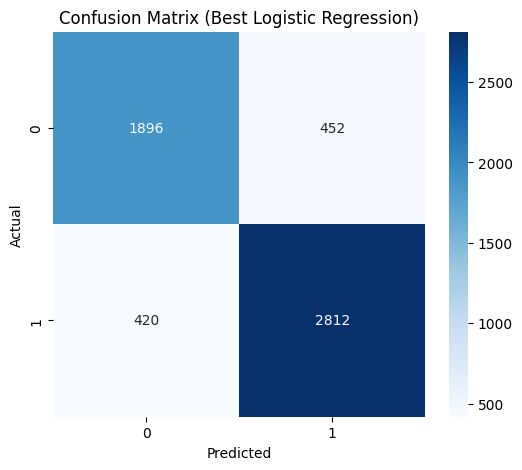

In [151]:
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Best Logistic Regression)")
plt.show()

 Berdasarkan *Confusion Matrix* dapat diketahui bahwa:
   - Model dengan benar memprediksi 1896 mahasiswa sebagai Tidak Depresi (*True Negative*).
   - Model salah memprediksi 452 mahasiswa sebagai Depresi, padahal sebenarnya mereka Tidak Depresi (*False Positive*).
   - Model salah memprediksi 420 mahasiswa sebagai Tidak Depresi, padahal sebenarnya mereka Depresi (*False Negative*).
   - Model dengan benar memprediksi 2812 mahasiswa sebagai Depresi (*True Positive*).

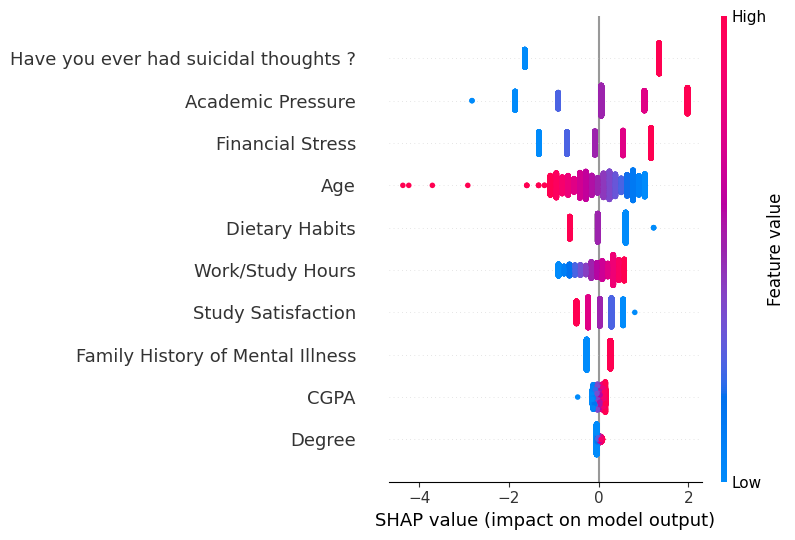

In [140]:
explainer = shap.Explainer(logistic_model, X_train_smote)
shap_values = explainer(X_test_scaled)

shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test_scaled.columns)

SHAP Summary Plot mengidentifikasi faktor-faktor risiko paling signifikan untuk depresi pada siswa berdasarkan model yang telah dibangun. **Faktor-faktor utama adalah adanya pikiran bunuh diri, tingginya tekanan akademik, dan tingginya stres finansial.** Faktor-faktor lain seperti usia muda, kebiasaan makan buruk, jam belajar panjang, kepuasan belajar rendah, riwayat keluarga, dan IPK rendah juga berkontribusi secara signifikan. 